In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv", index_col="id")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv", index_col="id")

In [3]:
print(f"{df_train.shape[0]} Rows")
print(f"{df_train.shape[1]} Features")
df_train.head(15)

188533 Rows
12 Features


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890


In [4]:
print(f"{df_test.shape[0]} Rows")
print(f"{df_test.shape[1]} Features")
df_test.head()

125690 Rows
11 Features


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [5]:
df_train.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [6]:
cat_cols = df_test.select_dtypes(["object"])
num_cols = df_test.select_dtypes(["int64"]) #No price feature

In [7]:
print("Training data unique")
print(df_train.nunique())
print()
print("Testing data unique")
print(df_test.nunique())

Training data unique
brand             57
model           1897
model_year        34
milage          6651
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

Testing data unique
brand             55
model           1891
model_year        36
milage          5700
fuel_type          7
engine          1117
transmission      52
ext_col          317
int_col          156
accident           2
clean_title        1
dtype: int64


In [8]:
print("Missing values")
df_train.isna().sum()

Missing values


brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [9]:
for col in cat_cols:
    print(f"{col} values: {df_train[col].unique()}")

brand values: ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
model values: ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
fuel_type values: ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
engine values: ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline F

Insights:
* Some features have "-" values instead of standard NaN values. It would probably do well to replace these with NaN
* From `engine`, we could extract features such as liters, cylinders, and horsepower. It also has info about `fuel_type` but that's redundant information
* `transmission` contains many types of transmissions. Most seem to be a variation of either automatic or manual. There are some exceptions though such as CVT (Continuously Variable Transmission) and DCT (dual-clutch transmission)
* The high cardinality of `ext_col` and `int_col` is because of variations of colors. For example, "Twilight Blue Metallic' and 'Electric Blue Metallic'
* The target column `price` has 1569 unique values, usually multiples of 100. This regression problem could actually instead be treated as a multi-class classification problem

Let's take a look at Teslas specifically

In [10]:
df_tesla = df_train[df_train["brand"] == "Tesla"]
df_tesla.head(15)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
194,Tesla,Model 3 Standard Range Plus,2021,42094,Gasoline,Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,32750
211,Tesla,Model Y Long Range,2020,60000,Gasoline,425.0HP Electric Motor Electric Fuel System,A/T,White,White,At least 1 accident or damage reported,Yes,60000
240,Tesla,Model Y Performance,2020,46897,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,29000
283,Tesla,Model Y Performance,2023,7578,NaN,Electric,Automatic,White,Black,None reported,NaN,267950


Most Teslas are missing `fuel type` which makes sense since they're electric. However, two entries above list them as Gasoline cars which doesn't make sense since no Teslas use gasoline. This is likely because of the artificial nature of this dataset. It may be best to leave it as it is because similar entries exist in the testing data as well.

Let's look at how the numerical features interact with `price`. These plots were inspired by @cdeotte's [notebook](https://www.kaggle.com/competitions/playground-series-s4e9/discussion/532952)

Text(0.5, 1.0, 'Price by Model Year')

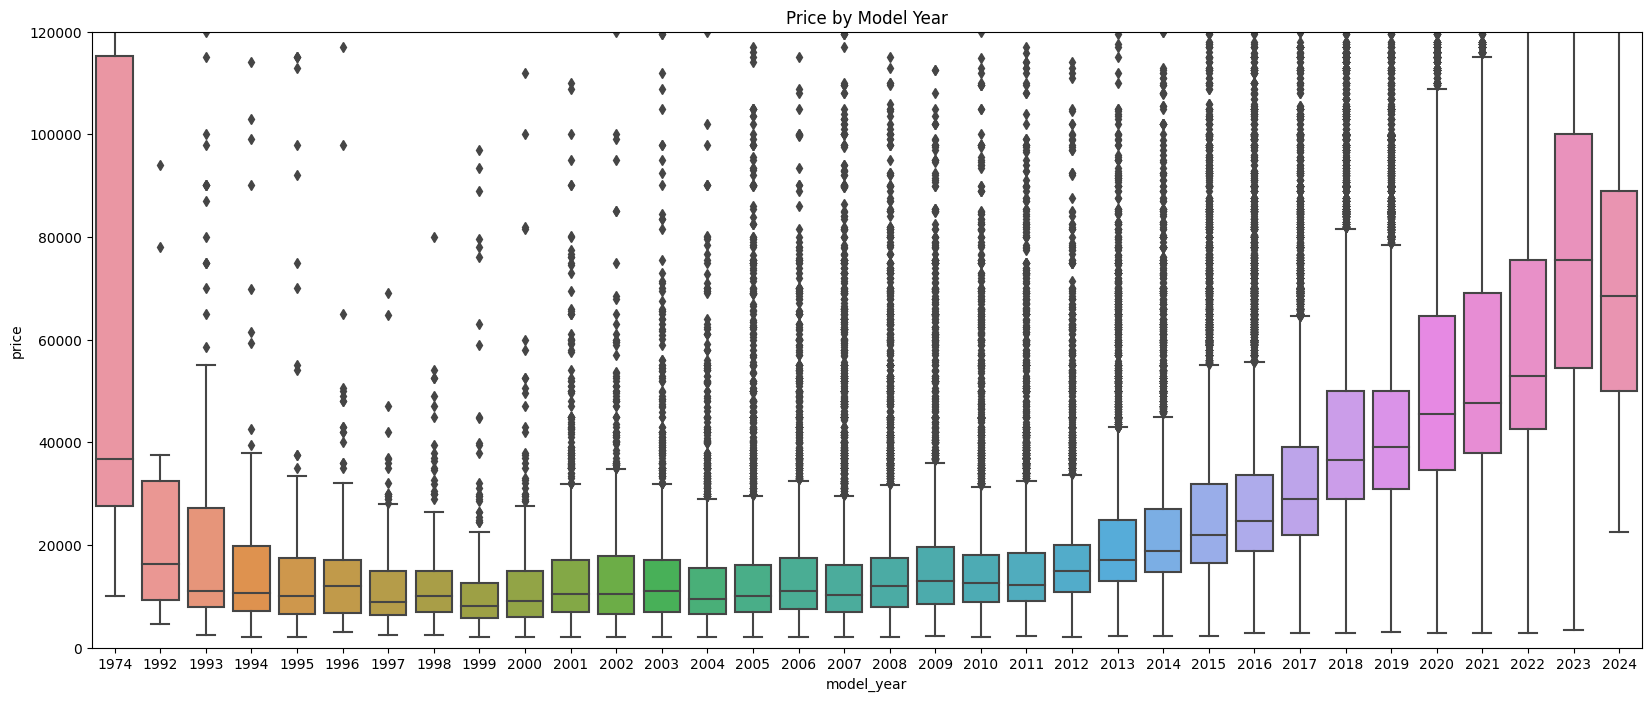

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_train, x="model_year", y="price", ax=ax)
ax.set_ylim(0, 120000) #Ignore huge outliers
ax.set_title('Price by Model Year')


Text(0.5, 1.0, 'Price by Milage')

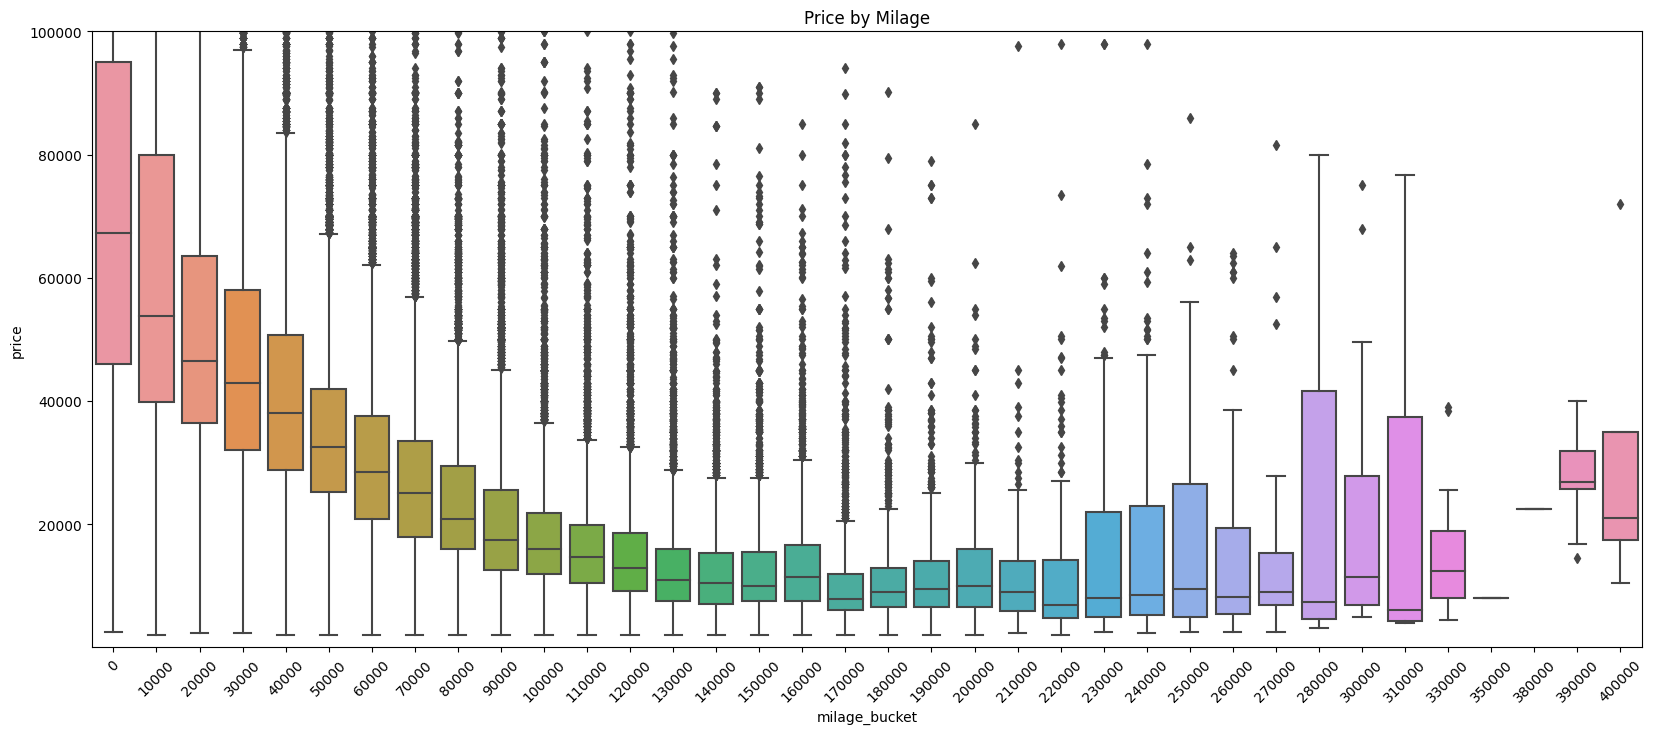

In [12]:
#Create buckets of milage
df_train["milage_bucket"] = (df_train["milage"]//10000)*10000

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df_train, x="milage_bucket", y="price", ax=ax)
ax.set_ylim(1,100000)
plt.xticks(rotation=45)
ax.set_title('Price by Milage')


As we can see above, both `milage` and `model_year` appear to have some correlation with `price`. It's important to note that some bins such as high milages and low model year's can't be trusted because of a lack of samples.

Finally, let's look at the distributions of `fuel_type`, `accident` and `clean_title` since these categorical features have the fewest values.

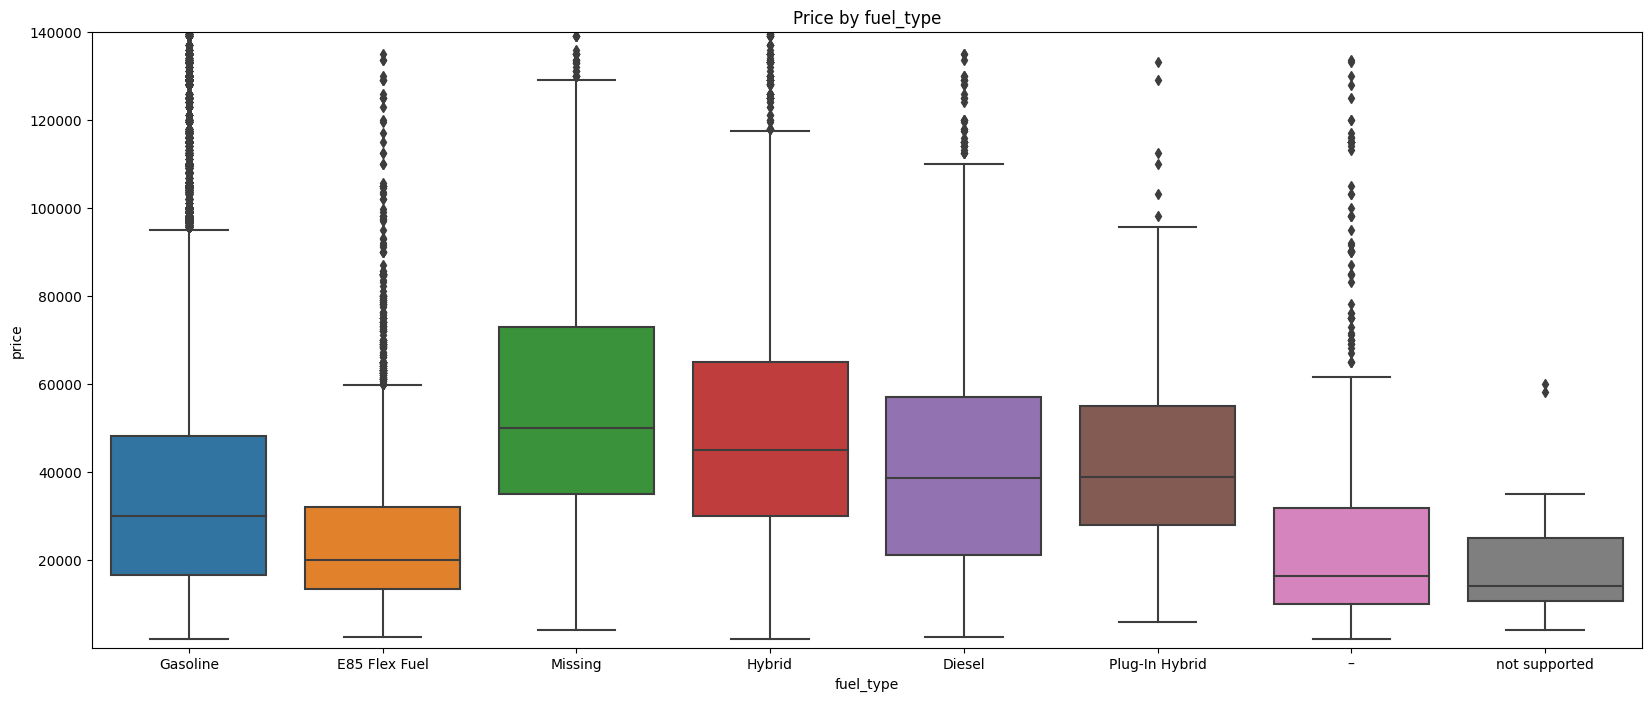

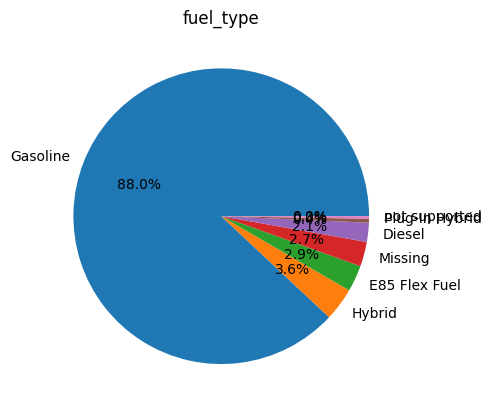

In [13]:
#Creates boxplots and a pie chart
def plot_category(df_train, col, ylim=100000):
    #convert NaN to Missing
    df_train[col] = df_train[col].fillna('Missing')

    fig, ax = plt.subplots(figsize=(20,8))
    sns.boxplot(data=df_train, x=col, y="price")
    ax.set_ylim(1,ylim)
    ax.set_title(f"Price by {col}")
    
    fig, ax = plt.subplots()
    counts = df_train[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(col)

plot_category(df_train, "fuel_type", 140000)

I think that its important to note that "Missing" values and "-" values have different distributions so it would be good to keep them seperate, even though "-" seems to repsent a missing value.

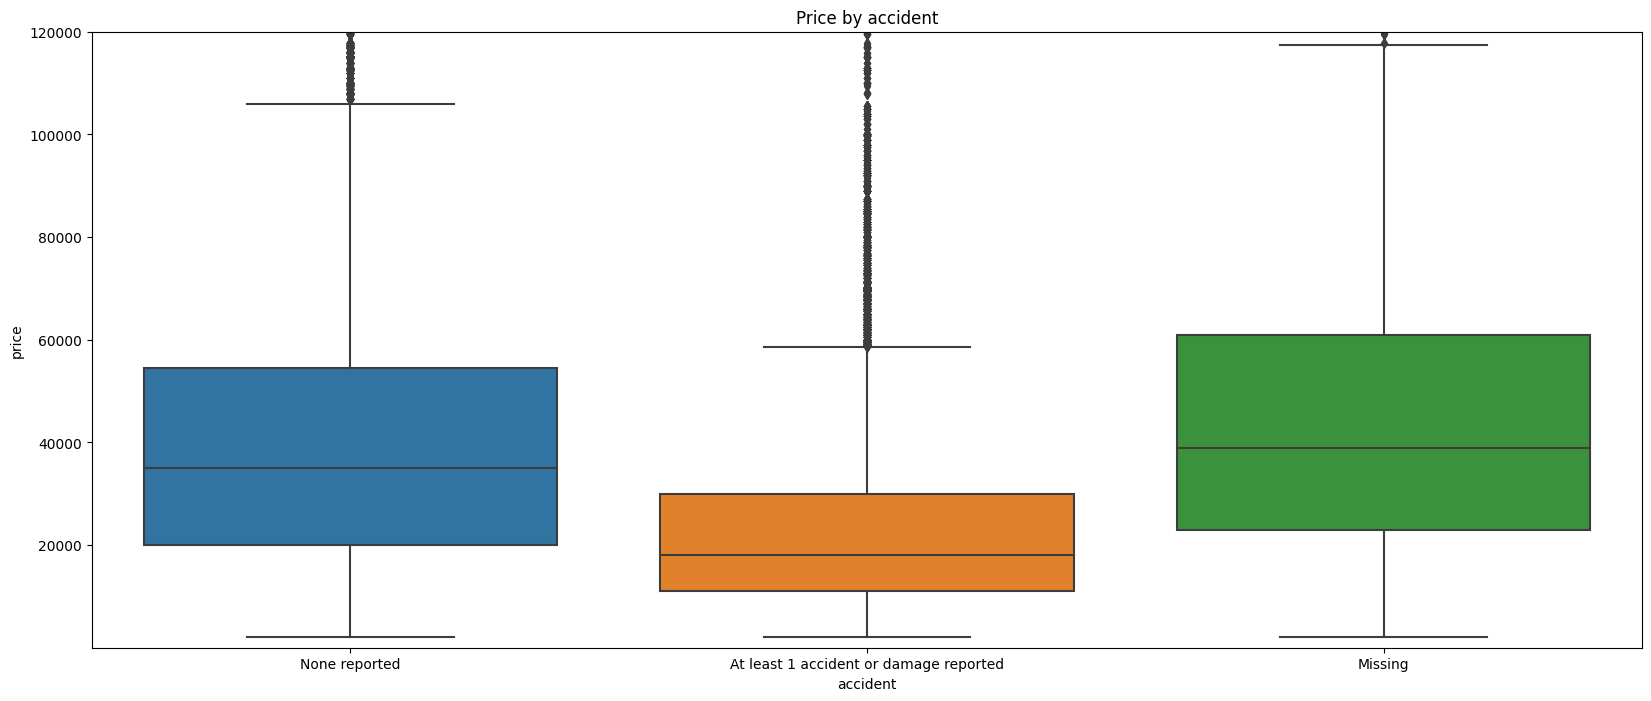

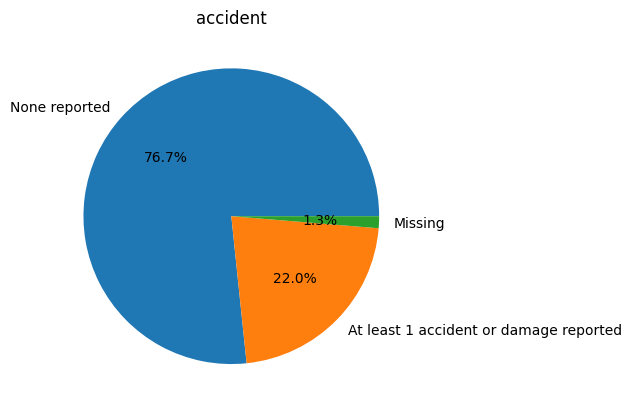

In [14]:
plot_category(df_train, "accident", 120000)

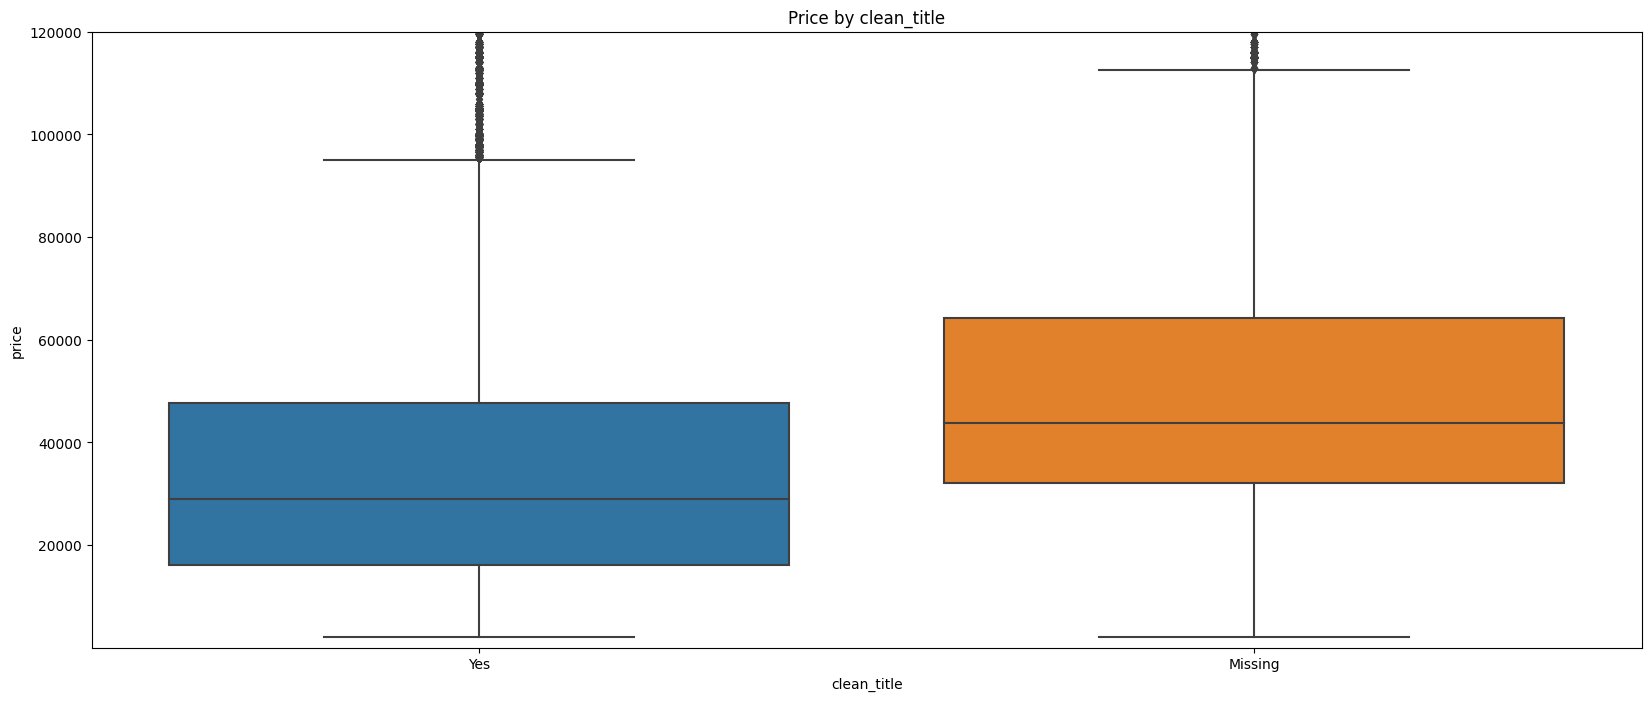

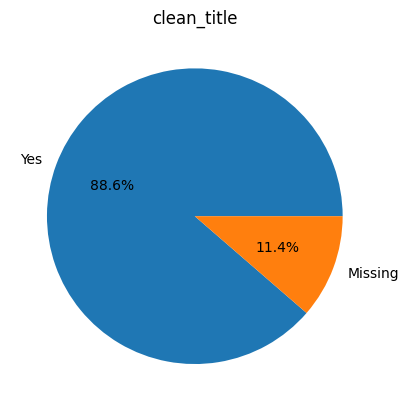

In [15]:
plot_category(df_train, "clean_title", 120000)